In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import json
from random import randint

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

In [2]:
# utility 
def show(img,s=8,b=False):
  # X = img.shape[0]
  plt.figure(figsize=(s,s))#,dpi=d)
  plt.imshow(img,cmap='gray')
  # plt.xticks(np.arange(-0.5, X),[])
  # plt.yticks(np.arange(-0.5, X),[])
  plt.grid(alpha=.2)
  plt.grid(b)
  plt.show()

In [3]:
img_read = cv2.imread('photo_2021-06-02_11-16-22.jpg')
img_read = cv2.cvtColor(img_read,cv2.COLOR_BGR2RGB)


In [4]:
img = img_read[150:950, :]
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

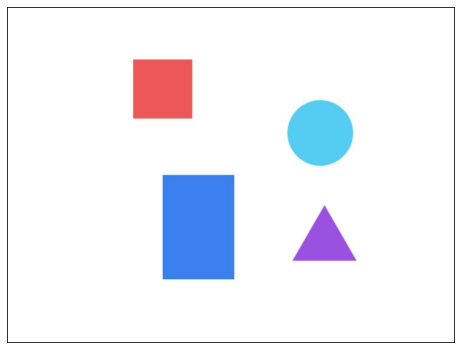

(800, 1067, 3)


In [5]:
show(img)
print(img.shape)

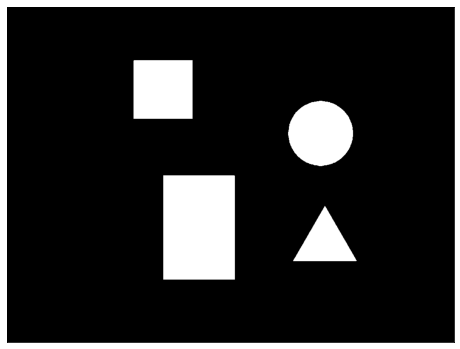

In [6]:
_,mask = cv2.threshold(gray, 180, 190, cv2.THRESH_BINARY_INV)

n = 20
karnel = np.ones((n,n), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, karnel)

show(mask)

In [7]:
contours,hierarchy= cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [8]:
print(len(contours))

4


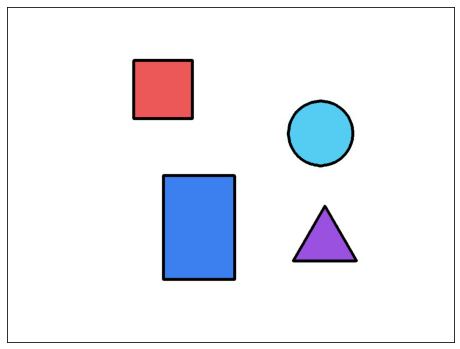

In [11]:
img_contour = img.copy()
img_contour = cv2.drawContours(img_contour, contours, -1, (0,0,0), 5)

show(img_contour)

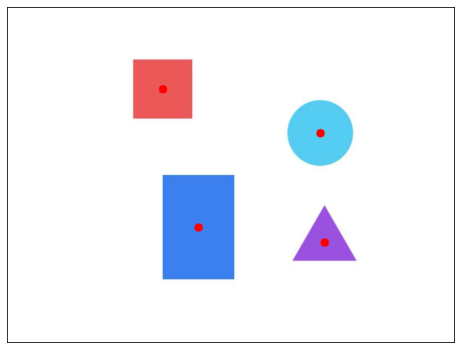

In [10]:
img_momentum = img.copy()
for i in range(len(contours)):
    M = cv2.moments(contours[i])

    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    img_momentum = cv2.circle(img_momentum, (cx, cy), 10, (255,0,0), -1)
show(img_momentum)

In [21]:
for i in range(len(contours)):
        
    length = cv2.arcLength(contours[i], True)
    areas = cv2.contourArea(contours[i])
    print(f'length {i} =', length)
    print(f'areas {i} =', areas)
    print('          ')

length 0 = 474.96045780181885
areas 0 = 9937.0
          
length 1 = 835.4142135381699
areas 1 = 42159.5
          
length 2 = 512.558436870575
areas 2 = 18513.0
          
length 3 = 557.4142135381699
areas 3 = 19459.5
          


x =  302 y =  127 w =  141 h =  140
3
x =  683 y =  475 w =  152 h =  132
4
x =  373 y =  402 w =  171 h =  249
13
x =  671 y =  224 w =  155 h =  156
4


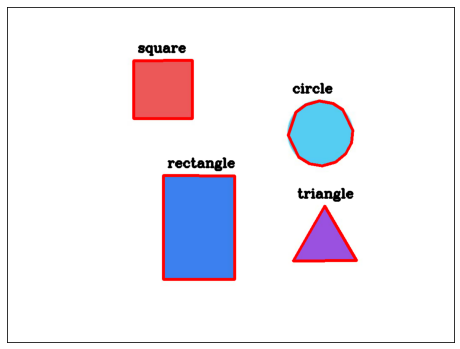

In [57]:
img_approx = img.copy()

shape = ['square', 'triangle' ,'rectangle', 'circle']
for i in range(len(contours)):

    x, y, w, h = cv2.boundingRect(approx)

    approx = cv2.approxPolyDP(contours[i], 0.01*length, True )
    
    img_approx = cv2.polylines(img_approx, [approx], True, (255,0,0), 5)

    img_approx = cv2.putText(img_approx, shape[i], (x+10,y-20), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 3)
    print('x = ', x, 'y = ', y, 'w = ', w, 'h = ', h)
    print(len(approx))
show(img_approx)

171 249
141 140


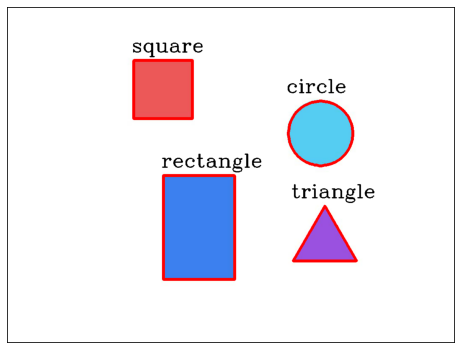

In [73]:
img_shape_recognition = img.copy()
shape = ['square', 'triangle' ,'rectangle', 'circle']
font = cv2.FONT_HERSHEY_COMPLEX
fontsize = 1.5
color = (0,0,0)
thickness = 2
for contour in contours:
     approx = cv2.approxPolyDP(contour, 0.01*length, True )
     img_shape_recognition = cv2.drawContours(img_shape_recognition, [contour], 0, (255,0,0), 5)

     x, y, w, h = cv2.boundingRect(approx)

     ord = (x-5, y-20)

     if len(approx) == 3:
         img_shape_recognition = cv2.putText(img_shape_recognition, shape[1], ord, font, fontsize, color, thickness)
     if len(approx) == 4:
         print(w, h)
         divition = w/h
         if divition >= 0.95 and divition <= 1.05:
             img_shape_recognition = cv2.putText(img_shape_recognition, shape[0],ord, font, fontsize, color, thickness)
         else:
             img_shape_recognition = cv2.putText(img_shape_recognition, shape[2], ord, font, fontsize, color, thickness)
     if len(approx) > 4:
         img_shape_recognition = cv2.putText(img_shape_recognition, shape[-1], ord, font, fontsize, color, thickness)

show(img_shape_recognition)
